In [1]:
import pandas as pd

df = pd.read_csv('churn_Modelling.csv')  # replace with your actual file name
print(df.head())
print(df.info())
print(df['Exited'].value_counts())  # Target column


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical columns
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression:

[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Random Forest:

[[1552   55]
 [ 213  180]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost:

[[1521   86]
 [ 175  218]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1607
           1       0.72      0.55      0.63       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [5]:
import joblib

joblib.dump(models['XGBoost'], 'churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

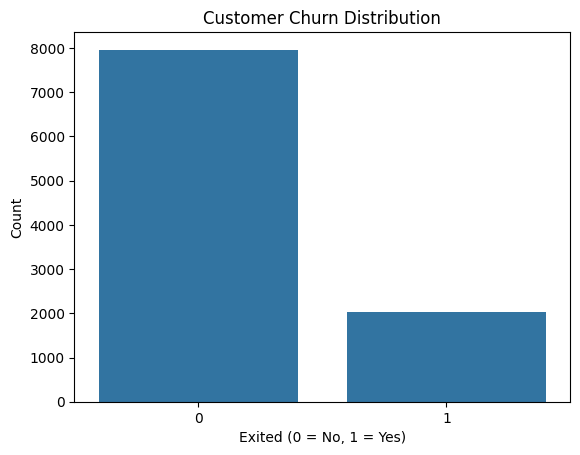

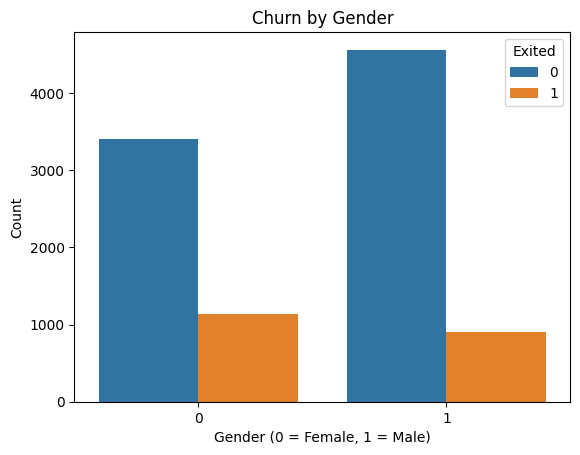

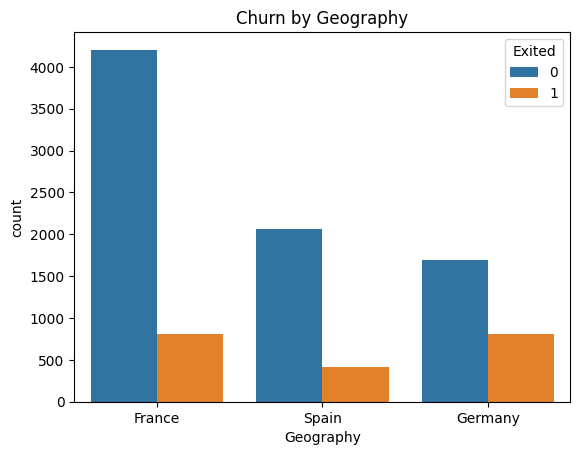

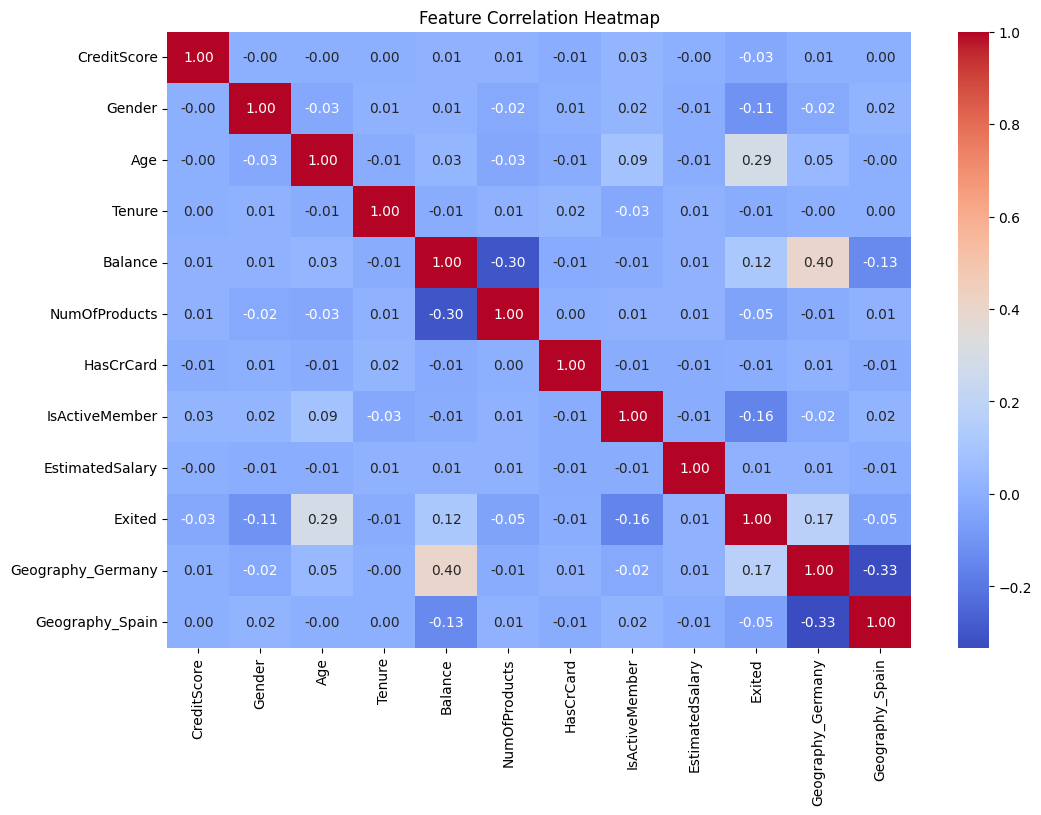

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()
sns.countplot(x='Geography', hue='Exited', data=pd.read_csv('churn_Modelling.csv'))
plt.title('Churn by Geography')
plt.show()
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


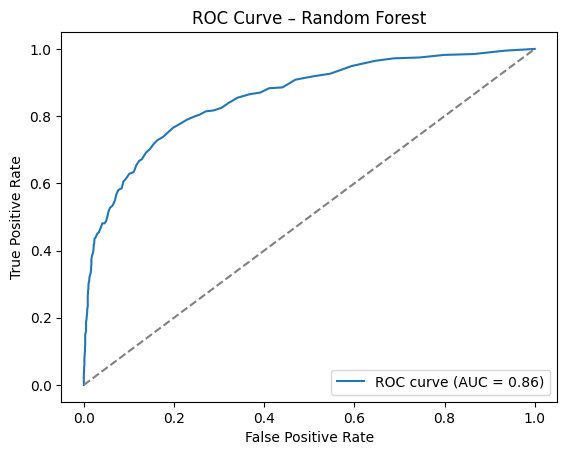

In [10]:
from sklearn.metrics import roc_curve, auc

model = models['Random Forest']
y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest')
plt.legend(loc='lower right')
plt.show()


In [11]:
import joblib

# Save each trained model
for name, model in models.items():
    joblib.dump(model, f'{name}_model.pkl')


In [18]:
log_reg = joblib.load('C:\\Users\\USER\\Desktop\\ML_projects\\customer_churn\\Logistic Regression_model.pkl')
rf = joblib.load('C:\\Users\\USER\\Desktop\\ML_projects\\customer_churn\\Random Forest_model.pkl')
gb = joblib.load('C:\\Users\\USER\\Desktop\\ML_projects\\customer_churn\\XGBoost_model.pkl')
